In [1]:
# Standard Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Images 
import os
import glob
from PIL import Image


# Libraries for Evaluations and Train/Test Split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#Model Visualization
from ann_visualizer.visualize import ann_viz

#Others
from tqdm import tqdm  # Optional: tqdm for progress bar
from concurrent.futures import ThreadPoolExecutor

In [2]:
from ann_visualizer.visualize import ann_viz


In [3]:
# Define the root folder where your subfolders (class folders) are located
root_folder_path = '/path/to/your/root/folder'
root_folder_path = '/Users/linuszarse/Documents/UNI/Master-Uni Potsdam/3. Semester/Machine Learning 2/Klausurprojekt/garbage_classification'

# Define the ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,       # Rescale pixel values to be between 0 and 1
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Random zoom
    horizontal_flip=True, # Random horizontal flip
    validation_split=0.2  # Split data into training and validation sets
)

# Define the target image size
target_size = (256,256)  # Adjust according to your model's input size

# Create the training data generator
train_generator = datagen.flow_from_directory(
    root_folder_path,
    target_size=target_size,
    batch_size=32,         # Adjust based on your system's memory
    class_mode='categorical',  # Assumes a classification task
    subset='training'      # Specify 'training' for training data
)

# Create the validation data generator
validation_generator = datagen.flow_from_directory(
    root_folder_path,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'    # Specify 'validation' for validation data
)


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [4]:
# Define the CNN model
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust 'num_classes' based on your task
])

# Compile the model
#model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model with the legacy Adam optimizer
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz

# Define the Sequential model
network = Sequential()

# Hidden Layer #1
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform',
                  input_dim=11))

# Hidden Layer #2
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform'))

# Output Layer
network.add(Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform'))

# Visualize the model
ann_viz(network, title="")


AttributeError: module 'keras.layers' has no attribute 'core'

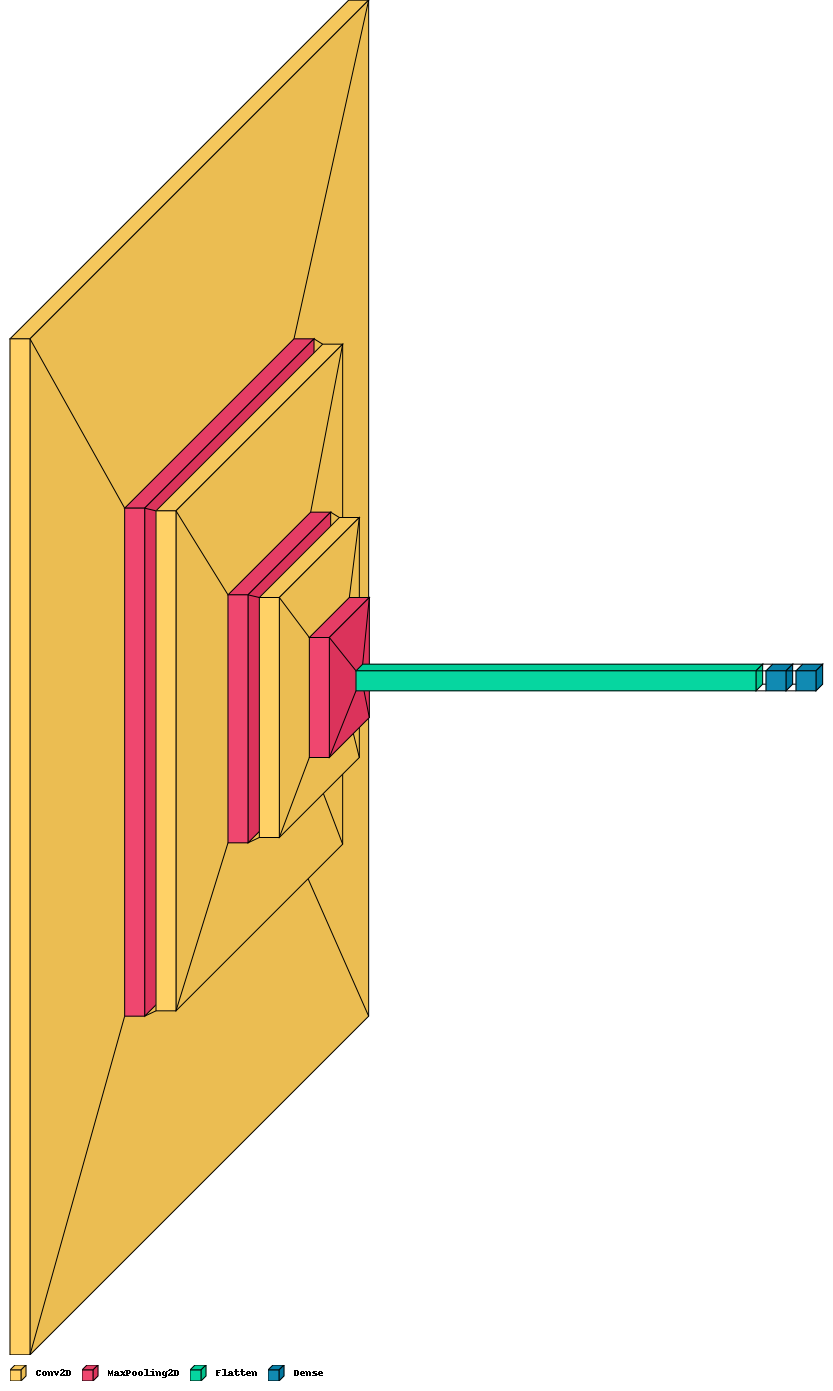

In [6]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [7]:
visualkeras.graph_view(model)

AttributeError: 'Sequential' object has no attribute '_layers'

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

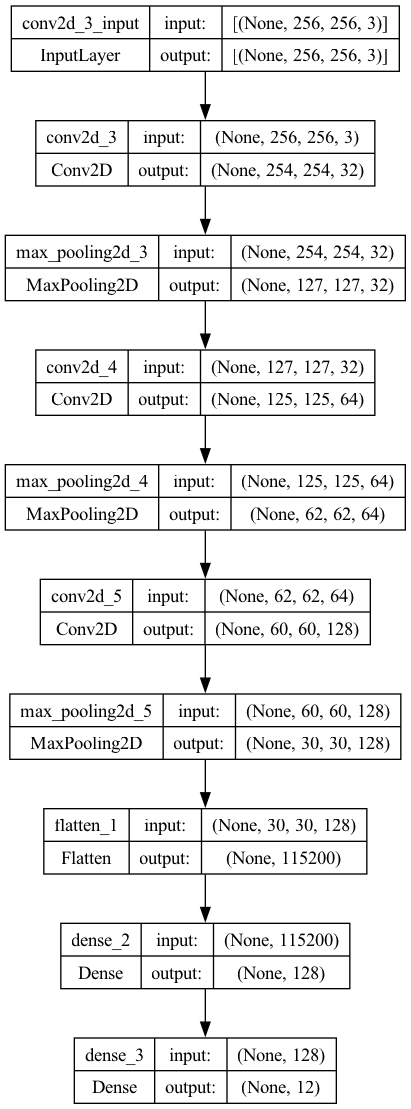

In [8]:
from tensorflow.keras.utils import plot_model

# Define the CNN model
num_classes = len(train_generator.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust 'num_classes' based on your task
])

# Compile the model with the legacy Adam optimizer
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Define the CNN model
num_classes = len(train_generator.class_indices)
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


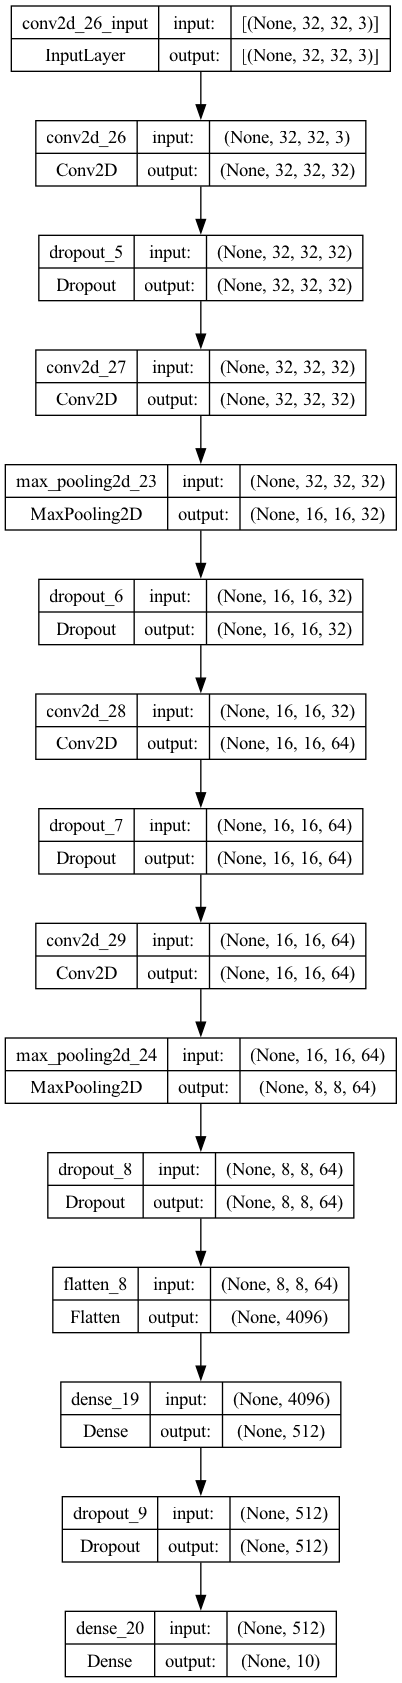

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

def build_cnn_model():
    model = Sequential()
    
    model.add(
      Conv2D(
          32, (3, 3),
          padding="same",
          input_shape=(32, 32, 3),
          activation="relu"))
    model.add(Dropout(0.2))
    
    model.add(
      Conv2D(
          32, (3, 3),
          padding="same",
          input_shape=(32, 32, 3),
          activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(
      Conv2D(
          64, (3, 3),
          padding="same",
          input_shape=(32, 32, 3),
          activation="relu"))
    model.add(Dropout(0.2))

    model.add(
          Conv2D(
              64, (3, 3),
              padding="same",
              input_shape=(32, 32, 3),
              activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation="softmax"))

    return model

model = build_cnn_model()

# Visualize the model and save the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
